# N - Asset Efficient Frontier

In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


```python

def plot_ef(n_points, er, cov, style = ".-" ):
    """
    Plots the N-asset efficient frontier
    """
    weights = minimize_vol(target_return)?????
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns":rets,
        "Volatility":vols
    })
    return ef.plot.line(x="Volatility", y = "Returns", style = style)
```

In [3]:
from scipy.optimize import minimize

<AxesSubplot:xlabel='Volatility'>

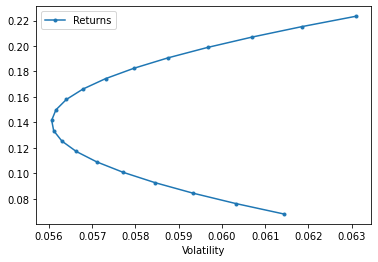

In [4]:
l = ["Games", "Fin"]
erk.plot_ef2(20,er[l], cov.loc[l,l])

In [9]:
import numpy as np
def minimize_vol(target_return, er, cov):
    """
    target_ret -> W
    """
    n = er.shape[0] #Number of assets
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    return_is_target = {
       'type': 'eq',
        'args':(er,),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights)-1
    }
    results = minimize(erk.portfolio_vol, init_guess,
                       args = (cov,), method="SLSQP",
                       options = {'disp': False},
                       constraints= (return_is_target, weights_sum_to_1),
                       bounds = bounds
                      )
    return results.x

In [7]:
l

['Games', 'Fin']

In [21]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l])
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [13]:
w15

array([0.47287631, 0.52712369])

In [27]:
import pandas as pd
def optimal_weights(n_points, er, cov):
    """
    -> list of weights to run the optimizer on to minimize the vol
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

def plot_ef(n_points, er, cov, style = ".-" ):
    """
    Plots the N-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov)
    rets = [erk.portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns":rets,
        "Volatility":vols
    })
    return ef.plot.line(x="Volatility", y = "Returns", style = style)

<AxesSubplot:xlabel='Volatility'>

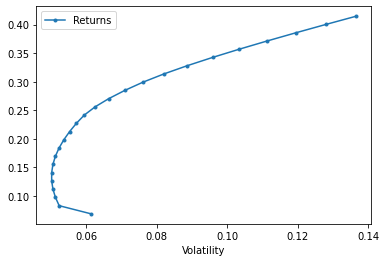

In [29]:
l = ["Smoke", "Fin", "Games", "Coal"]
erk.plot_ef(25, er[l], cov.loc[l,l])